In [ ]:
pip install requests beautifulsoup4 pandas

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Data Collection Data BPS Semarang

In [ ]:
# URL halaman yang berisi tabel
url = "https://semarangkota.bps.go.id/indicator/12/48/1/luas-wilayah-jumlah-penduduk-dan-kepadatan-penduduk.html"

# Mendapatkan konten halaman menggunakan requests
response = requests.get(url)

# Memeriksa apakah permintaan berhasil
if response.status_code == 200:
    # Parsing HTML menggunakan BeautifulSoup
    soup = BeautifulSoup(response.content, "html.parser")

    # Mencari tabel dengan id "tablex"
    table = soup.find("table", {"id": "tablex"})

    # Membaca tabel dan mengonversi ke DataFrame menggunakan pandas
    if table:
        # Membaca tabel ke DataFrame tanpa membaca baris header
        df = pd.read_html(str(table), header=1)[0]

        # Menghapus karakter spasi tambahan dari data
        df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

        # Menyimpan DataFrame ke dalam file CSV dengan format yang rapi
        csv_filename = "Kepadatan_Penduduk_Kota_Semarang.csv"
        df.to_csv(csv_filename, index=False)

        print("Data telah disimpan dalam file CSV dengan nama:", csv_filename)
    else:
        print("Tidak dapat menemukan tabel dengan ID yang diberikan.")
else:
    print("Gagal mendapatkan konten halaman.")

Data telah disimpan dalam file CSV dengan nama: Kepadatan_Penduduk_Kota_Semarang.csv


In [ ]:
df

,Kecamatan,Luas Wilayah,Luas Wilayah.1,Luas Wilayah.2,Jumlah Penduduk,Jumlah Penduduk.1,Jumlah Penduduk.2,Kepadatan Penduduk,Kepadatan Penduduk.1,Kepadatan Penduduk.2
0,Kecamatan,2021,2022,2023,2021,2022,2023,2021,2022,2023
1,Mijen,5652,5652,5652,"83 321,00","85 818,00","89 948,00","1 474,10","1 518,28","1 591,35"
2,Gunungpati,5827,5827,5827,"98 343,00","98 674,00","100 752,00","1 687,66","1 693,34","1 729,00"
3,Banyumanik,2974,2974,2974,"141 689,00","141 319,00","143 433,00","4 763,89","4 751,45","4 822,53"
4,Gajahmungkur,934,934,934,"55 857,00","55 490,00","56 350,00","5 977,97","5 938,69","6 030,73"
5,Smg Selatan,595,595,595,"61 616,00","61 212,00","62 179,00","10 362,05","10 294,11","10 456,73"
6,Candisari,640,640,640,"74 952,00","74 461,00","75 614,00","11 716,59","11 639,84","11 820,08"
7,Tembalang,3947,3947,3947,"191 560,00","193 480,00","198 862,00","4 853,37","4 902,02","5 038,38"
8,Pedurungan,2111,2111,2111,"193 128,00","193 125,00","196 526,00","9 148,80","9 148,66","9 309,77"
9,Genuk,2598,2598,2598,"125 967,00","128 696,00","132 473,00","4 848,79","4 953,84","5 099,22"


# Data Preprocessing - Data Cleansing

pada proses data cleansing akan melibatkan pembersihan data dari karakter yang tidak diperlukan dan mengonversi kolom dengan tipe objek ke tipe numerik.

In [ ]:
df.isnull().sum()

Kecamatan               0
Luas Wilayah            0
Luas Wilayah.1          0
Luas Wilayah.2          0
Jumlah Penduduk         0
Jumlah Penduduk.1       0
Jumlah Penduduk.2       0
Kepadatan Penduduk      0
Kepadatan Penduduk.1    0
Kepadatan Penduduk.2    0
dtype: int64

In [ ]:
df = df.drop([0,17])
df

,Kecamatan,Luas Wilayah,Luas Wilayah.1,Luas Wilayah.2,Jumlah Penduduk,Jumlah Penduduk.1,Jumlah Penduduk.2,Kepadatan Penduduk,Kepadatan Penduduk.1,Kepadatan Penduduk.2
1,Mijen,5652,5652,5652,"83 321,00","85 818,00","89 948,00","1 474,10","1 518,28","1 591,35"
2,Gunungpati,5827,5827,5827,"98 343,00","98 674,00","100 752,00","1 687,66","1 693,34","1 729,00"
3,Banyumanik,2974,2974,2974,"141 689,00","141 319,00","143 433,00","4 763,89","4 751,45","4 822,53"
4,Gajahmungkur,934,934,934,"55 857,00","55 490,00","56 350,00","5 977,97","5 938,69","6 030,73"
5,Smg Selatan,595,595,595,"61 616,00","61 212,00","62 179,00","10 362,05","10 294,11","10 456,73"
6,Candisari,640,640,640,"74 952,00","74 461,00","75 614,00","11 716,59","11 639,84","11 820,08"
7,Tembalang,3947,3947,3947,"191 560,00","193 480,00","198 862,00","4 853,37","4 902,02","5 038,38"
8,Pedurungan,2111,2111,2111,"193 128,00","193 125,00","196 526,00","9 148,80","9 148,66","9 309,77"
9,Genuk,2598,2598,2598,"125 967,00","128 696,00","132 473,00","4 848,79","4 953,84","5 099,22"
10,Gayamsari,622,622,622,"69 792,00","69 334,00","70 409,00","11 220,74","11 147,11","11 319,94"


In [ ]:
df = df
df.columns.values[1] = 'Luas Wilayah Tahun 2021'
df.columns.values[2] = 'Luas Wilayah Tahun 2022'
df.columns.values[3] = 'Luas Wilayah Tahun 2023'
df.columns.values[4] = 'Jumlah Penduduk Tahun 2021'
df.columns.values[5] = 'Jumlah Penduduk Tahun 2022'
df.columns.values[6] = 'Jumlah Penduduk Tahun 2023'
df.columns.values[7] = 'Kepadatan Penduduk Tahun 2021'
df.columns.values[8] = 'Kepadatan Penduduk Tahun 2022'
df.columns.values[9] = 'Kepadatan Penduduk Tahun 2023'

# Menampilkan DataFrame setelah perubahan
print("\nBerikut Perubahan header pada DataFrame:")
df


Berikut Perubahan header pada DataFrame:


,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk Tahun 2021,Kepadatan Penduduk Tahun 2022,Kepadatan Penduduk Tahun 2023
1,Mijen,5652,5652,5652,"83 321,00","85 818,00","89 948,00","1 474,10","1 518,28","1 591,35"
2,Gunungpati,5827,5827,5827,"98 343,00","98 674,00","100 752,00","1 687,66","1 693,34","1 729,00"
3,Banyumanik,2974,2974,2974,"141 689,00","141 319,00","143 433,00","4 763,89","4 751,45","4 822,53"
4,Gajahmungkur,934,934,934,"55 857,00","55 490,00","56 350,00","5 977,97","5 938,69","6 030,73"
5,Smg Selatan,595,595,595,"61 616,00","61 212,00","62 179,00","10 362,05","10 294,11","10 456,73"
6,Candisari,640,640,640,"74 952,00","74 461,00","75 614,00","11 716,59","11 639,84","11 820,08"
7,Tembalang,3947,3947,3947,"191 560,00","193 480,00","198 862,00","4 853,37","4 902,02","5 038,38"
8,Pedurungan,2111,2111,2111,"193 128,00","193 125,00","196 526,00","9 148,80","9 148,66","9 309,77"
9,Genuk,2598,2598,2598,"125 967,00","128 696,00","132 473,00","4 848,79","4 953,84","5 099,22"
10,Gayamsari,622,622,622,"69 792,00","69 334,00","70 409,00","11 220,74","11 147,11","11 319,94"


In [ ]:
# Membersihkan data
# 1. Menghapus spasi tambahan di nama kolom
df.columns = df.columns.str.strip()
df.head(4)

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk Tahun 2021,Kepadatan Penduduk Tahun 2022,Kepadatan Penduduk Tahun 2023
1,Mijen,5652,5652,5652,"83 321,00","85 818,00","89 948,00","1 474,10","1 518,28","1 591,35"
2,Gunungpati,5827,5827,5827,"98 343,00","98 674,00","100 752,00","1 687,66","1 693,34","1 729,00"
3,Banyumanik,2974,2974,2974,"141 689,00","141 319,00","143 433,00","4 763,89","4 751,45","4 822,53"
4,Gajahmungkur,934,934,934,"55 857,00","55 490,00","56 350,00","5 977,97","5 938,69","6 030,73"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Kecamatan                      16 non-null     object
 1   Luas Wilayah Tahun 2021        16 non-null     int64 
 2   Luas Wilayah Tahun 2022        16 non-null     int64 
 3   Luas Wilayah Tahun 2023        16 non-null     int64 
 4   Jumlah Penduduk Tahun 2021     16 non-null     object
 5   Jumlah Penduduk Tahun 2022     16 non-null     object
 6   Jumlah Penduduk Tahun 2023     16 non-null     object
 7   Kepadatan Penduduk Tahun 2021  16 non-null     object
 8   Kepadatan Penduduk Tahun 2022  16 non-null     object
 9   Kepadatan Penduduk Tahun 2023  16 non-null     object
dtypes: int64(3), object(7)
memory usage: 1.4+ KB


In [ ]:
def clean_and_convert(column):
    return column.apply(lambda x: int(float(str(x).replace(' ', '').replace(',', '').replace('.00', '')) / 100))

# Mengonversi kolom berdasarkan indeks kolom
columns_to_convert = df.columns[4:7]  # Misalnya, kolom dari indeks 3 hingga 6
for column in columns_to_convert:
    df[column] = clean_and_convert(df[column])

# Menampilkan dataFrame yang telah dikonversi
df.dtypes
df.head()

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk Tahun 2021,Kepadatan Penduduk Tahun 2022,Kepadatan Penduduk Tahun 2023
1,Mijen,5652,5652,5652,83321,85818,89948,"1 474,10","1 518,28","1 591,35"
2,Gunungpati,5827,5827,5827,98343,98674,100752,"1 687,66","1 693,34","1 729,00"
3,Banyumanik,2974,2974,2974,141689,141319,143433,"4 763,89","4 751,45","4 822,53"
4,Gajahmungkur,934,934,934,55857,55490,56350,"5 977,97","5 938,69","6 030,73"
5,Smg Selatan,595,595,595,61616,61212,62179,"10 362,05","10 294,11","10 456,73"


In [ ]:
# Membuat data baru dengan mengambil kolom yang diinginkan
data = df[['Kecamatan',
                'Luas Wilayah Tahun 2021', 'Luas Wilayah Tahun 2022', 'Luas Wilayah Tahun 2023',
                'Jumlah Penduduk Tahun 2021', 'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023']].copy()
data.head(5)

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023
1,Mijen,5652,5652,5652,83321,85818,89948
2,Gunungpati,5827,5827,5827,98343,98674,100752
3,Banyumanik,2974,2974,2974,141689,141319,143433
4,Gajahmungkur,934,934,934,55857,55490,56350
5,Smg Selatan,595,595,595,61616,61212,62179


In [ ]:
df.drop(columns=['Kepadatan Penduduk Tahun 2021'], inplace=True)
df.drop(columns=['Kepadatan Penduduk Tahun 2022'], inplace=True)
df.drop(columns=['Kepadatan Penduduk Tahun 2023'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 1 to 16
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Kecamatan                   16 non-null     object
 1   Luas Wilayah Tahun 2021     16 non-null     int64 
 2   Luas Wilayah Tahun 2022     16 non-null     int64 
 3   Luas Wilayah Tahun 2023     16 non-null     int64 
 4   Jumlah Penduduk Tahun 2021  16 non-null     int64 
 5   Jumlah Penduduk Tahun 2022  16 non-null     int64 
 6   Jumlah Penduduk Tahun 2023  16 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.0+ KB


In [ ]:
df.describe()

,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2336.125000,2336.125000,2336.125000,103535.250000,103748.437500,105921.437500
std,1810.793486,1810.793486,1810.793486,49380.213219,49683.062807,50802.774226
min,517.000000,517.000000,517.000000,32948.000000,33079.000000,33795.000000
25%,635.500000,635.500000,635.500000,64798.250000,64373.250000,65405.500000
50%,2139.500000,2139.500000,2139.500000,90832.000000,92246.000000,95350.000000
75%,3217.250000,3217.250000,3217.250000,141799.500000,141627.500000,143948.500000
max,5827.000000,5827.000000,5827.000000,193128.000000,193480.000000,198862.000000


In [ ]:
# 5 kecamatan dengan Jumlah Penduduk Tertinggi
top5_2021 = df.nlargest(5, 'Jumlah Penduduk Tahun 2021')[['Kecamatan','Jumlah Penduduk Tahun 2021']]
top5_2022 = df.nlargest(5, 'Jumlah Penduduk Tahun 2022')[['Kecamatan','Jumlah Penduduk Tahun 2022']]
top5_2023 = df.nlargest(5, 'Jumlah Penduduk Tahun 2023')[['Kecamatan','Jumlah Penduduk Tahun 2023']]

# 5 kecamatan dengan Jumlah Penduduk Terendah
bottom5_2021 = df.nsmallest(5, 'Jumlah Penduduk Tahun 2021')[['Kecamatan','Jumlah Penduduk Tahun 2021']]
bottom5_2022 = df.nsmallest(5, 'Jumlah Penduduk Tahun 2022')[['Kecamatan','Jumlah Penduduk Tahun 2022']]
bottom5_2023 = df.nsmallest(5, 'Jumlah Penduduk Tahun 2023')[['Kecamatan','Jumlah Penduduk Tahun 2023']]

print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2021 Tertinggi: ")
display(top5_2021)
print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2021 Terendah: ")
display(bottom5_2021)
print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2022 Tertinggi: ")
display(top5_2022)
print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2022 Terendah: ")
display(bottom5_2022)
print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2023 Tertinggi: ")
display(top5_2023)
print("\n 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2023 Terendah: ")
display(bottom5_2023)


 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2021 Tertinggi: 


,Kecamatan,Jumlah Penduduk Tahun 2021
8,Pedurungan,193128
7,Tembalang,191560
14,Smg Barat,147885
16,Ngaliyan,142131
3,Banyumanik,141689



 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2021 Terendah: 


,Kecamatan,Jumlah Penduduk Tahun 2021
15,Tugu,32948
13,Smg Tengah,54696
4,Gajahmungkur,55857
5,Smg Selatan,61616
11,Smg Timur,65859



 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2022 Tertinggi: 


,Kecamatan,Jumlah Penduduk Tahun 2022
7,Tembalang,193480
8,Pedurungan,193125
14,Smg Barat,146915
16,Ngaliyan,142553
3,Banyumanik,141319



 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2022 Terendah: 


,Kecamatan,Jumlah Penduduk Tahun 2022
15,Tugu,33079
13,Smg Tengah,54338
4,Gajahmungkur,55490
5,Smg Selatan,61212
11,Smg Timur,65427



 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2023 Tertinggi: 


,Kecamatan,Jumlah Penduduk Tahun 2023
7,Tembalang,198862
8,Pedurungan,196526
14,Smg Barat,149326
16,Ngaliyan,145495
3,Banyumanik,143433



 5 Kecamatan dengan Jumlah Penduduk pada Tahun 2023 Terendah: 


,Kecamatan,Jumlah Penduduk Tahun 2023
15,Tugu,33795
13,Smg Tengah,55213
4,Gajahmungkur,56350
5,Smg Selatan,62179
11,Smg Timur,66481


In [ ]:
# 5 kecamatan dengan Luas Wilayah Tertinggi
top5_2021 = df.nlargest(5, 'Luas Wilayah Tahun 2021')[['Kecamatan','Luas Wilayah Tahun 2021']]
top5_2022 = df.nlargest(5, 'Luas Wilayah Tahun 2022')[['Kecamatan','Luas Wilayah Tahun 2022']]
top5_2023 = df.nlargest(5, 'Luas Wilayah Tahun 2023')[['Kecamatan','Luas Wilayah Tahun 2023']]

# 5 kecamatan dengan Luas Wilayah Terendah
bottom5_2021 = df.nsmallest(5, 'Luas Wilayah Tahun 2021')[['Kecamatan','Luas Wilayah Tahun 2021']]
bottom5_2022 = df.nsmallest(5, 'Luas Wilayah Tahun 2022')[['Kecamatan','Luas Wilayah Tahun 2022']]
bottom5_2023 = df.nsmallest(5, 'Luas Wilayah Tahun 2023')[['Kecamatan','Luas Wilayah Tahun 2023']]

print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2021 Tertinggi: ")
display(top5_2021)
print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2021 Terendah: ")
display(bottom5_2021)
print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2022 Tertinggi: ")
display(top5_2022)
print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2022 Terendah: ")
display(bottom5_2022)
print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2023 Tertinggi: ")
display(top5_2023)
print("\n 5 Kecamatan dengan Luas Wilayah pada Tahun 2023 Terendah: ")
display(bottom5_2023)


 5 Kecamatan dengan Luas Wilayah pada Tahun 2021 Tertinggi: 


,Kecamatan,Luas Wilayah Tahun 2021
2,Gunungpati,5827
1,Mijen,5652
16,Ngaliyan,4299
7,Tembalang,3947
3,Banyumanik,2974



 5 Kecamatan dengan Luas Wilayah pada Tahun 2021 Terendah: 


,Kecamatan,Luas Wilayah Tahun 2021
13,Smg Tengah,517
11,Smg Timur,542
5,Smg Selatan,595
10,Gayamsari,622
6,Candisari,640



 5 Kecamatan dengan Luas Wilayah pada Tahun 2022 Tertinggi: 


,Kecamatan,Luas Wilayah Tahun 2022
2,Gunungpati,5827
1,Mijen,5652
16,Ngaliyan,4299
7,Tembalang,3947
3,Banyumanik,2974



 5 Kecamatan dengan Luas Wilayah pada Tahun 2022 Terendah: 


,Kecamatan,Luas Wilayah Tahun 2022
13,Smg Tengah,517
11,Smg Timur,542
5,Smg Selatan,595
10,Gayamsari,622
6,Candisari,640



 5 Kecamatan dengan Luas Wilayah pada Tahun 2023 Tertinggi: 


,Kecamatan,Luas Wilayah Tahun 2023
2,Gunungpati,5827
1,Mijen,5652
16,Ngaliyan,4299
7,Tembalang,3947
3,Banyumanik,2974



 5 Kecamatan dengan Luas Wilayah pada Tahun 2023 Terendah: 


,Kecamatan,Luas Wilayah Tahun 2023
13,Smg Tengah,517
11,Smg Timur,542
5,Smg Selatan,595
10,Gayamsari,622
6,Candisari,640


# Data Transformation
Data Transformation bisa melibatkan normalisasi yang dilakukan untuk memastikan semua fitur berada dalam skala yang sama dan Mengubah data menjadi format yang lebih cocok untuk analisis.

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [ ]:
columns_to_normalize = df.columns[1:10]
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Menampilkan tipe data untuk memastikan semuanya float
df.dtypes
df.head()

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023
1,Mijen,0.967043,0.967043,0.967043,0.314477,0.328795,0.340183
2,Gunungpati,1.000000,1.000000,1.000000,0.408259,0.408944,0.405635
3,Banyumanik,0.462712,0.462712,0.462712,0.678868,0.674809,0.664203
4,Gajahmungkur,0.078531,0.078531,0.078531,0.143020,0.139719,0.136641
5,Smg Selatan,0.014689,0.014689,0.014689,0.178974,0.175392,0.171954


# Data Reduction
Mereduksi data menggunakan Principal Component Analysis (PCA) sebagai cara untuk mengurangi dimensi data, mengurangi kompleksitas data tanpa kehilangan informasi penting. Dengan mengurangi ukuran data agar lebih mudah dianalisis tanpa kehilangan informasi penting. Ini bisa melibatkan pemilihan fitur (feature selection) atau pengurangan dimensi (dimensionality reduction).

In [ ]:
# Menggunakan PCA untuk reduksi dimensi
pca = PCA(n_components=2)  # Mengurangi menjadi 2 dimensi
df_reduced = pca.fit_transform(df[columns_to_normalize])

# Mengonversi kembali hasil PCA ke DataFrame untuk kemudahan penggunaan
df_reduced = pd.DataFrame(df_reduced, columns=['PC1', 'PC2'])

df_reduced.head()

,PC1,PC2
0,0.740217,0.812164
1,0.869575,0.737127
2,0.411016,-0.193746
3,-0.678805,0.133036
4,-0.728905,0.016723


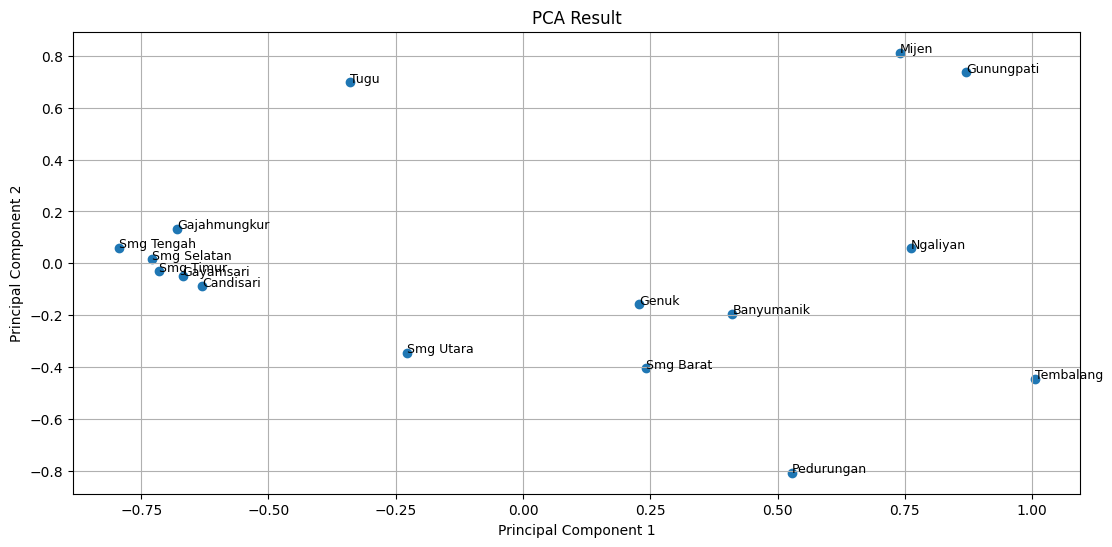

In [ ]:
import matplotlib.pyplot as plt

# Membuat plot untuk data yang telah direduksi
plt.figure(figsize=(13, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'])

# Memberikan label pada plot
for i, txt in enumerate(df['Kecamatan']):
    plt.annotate(txt, (df_reduced['PC1'][i], df_reduced['PC2'][i]), fontsize=9)

plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Exploratory Data Analysis
Exploratory Data Analysis merupakan proses analisis data untuk melakukan visualisasi dan meringkas karakteristik utama dari dataset menggunakan metode visual dan teknik statistik sederhana. Tujuannya adalah untuk memahami informasi yang terkandung dalam data sebelum dilakukan analisis lebih lanjut.

In [ ]:
df.describe()

,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.342585,0.342585,0.342585,0.440675,0.440580,0.436952
std,0.341016,0.341016,0.341016,0.308280,0.309743,0.307771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.022316,0.022316,0.022316,0.198840,0.195100,0.191501
50%,0.305556,0.305556,0.305556,0.361368,0.368869,0.372909
75%,0.508522,0.508522,0.508522,0.679557,0.676732,0.667326
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.columns

Index(['Kecamatan', 'Luas Wilayah Tahun 2021', 'Luas Wilayah Tahun 2022',
       'Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2021',
       'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023'],
      dtype='object')

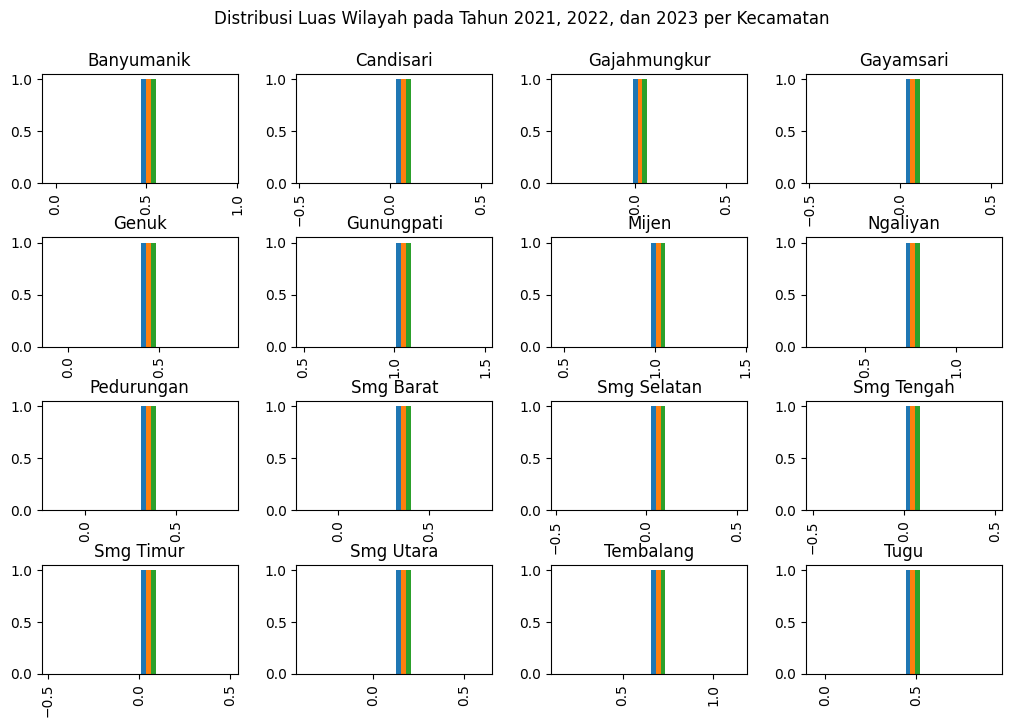

In [ ]:
# Histogram Distribusi Luas Wilayah
df.hist(column=['Luas Wilayah Tahun 2021', 'Luas Wilayah Tahun 2022', 'Luas Wilayah Tahun 2023'], by='Kecamatan', figsize=(12, 8))
plt.suptitle('Distribusi Luas Wilayah pada Tahun 2021, 2022, dan 2023 per Kecamatan')
plt.show()

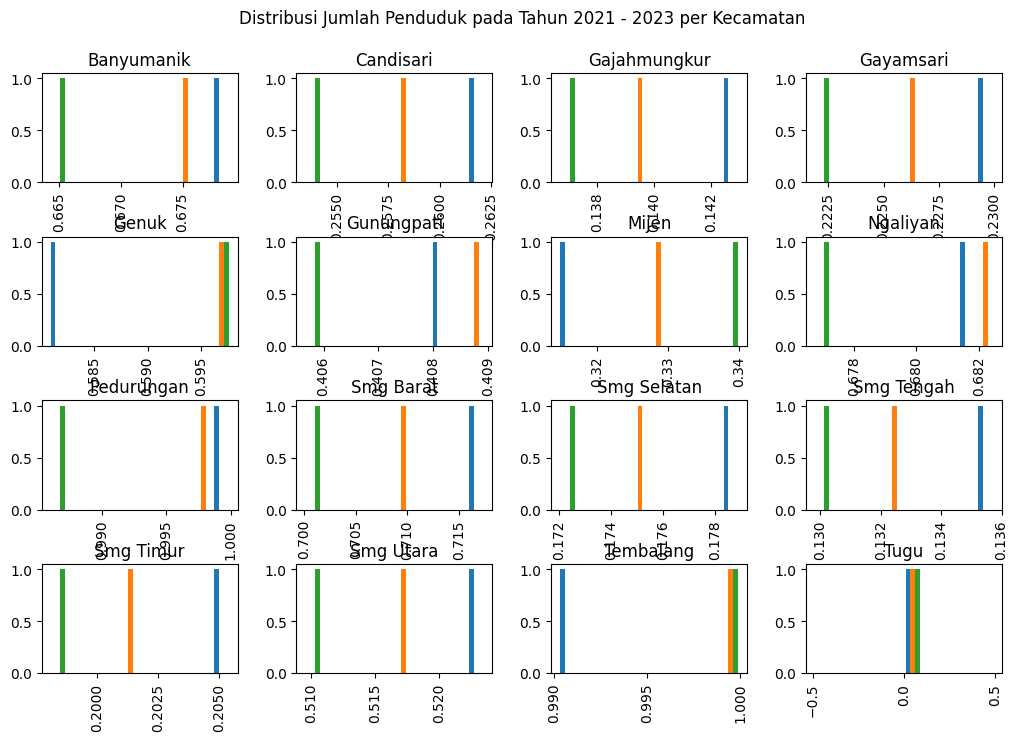

In [ ]:
# Histogram Distribusi Jumlah Penduduk
df.hist(column=['Jumlah Penduduk Tahun 2021', 'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023'], by='Kecamatan', figsize=(12, 8))
plt.suptitle('Distribusi Jumlah Penduduk pada Tahun 2021 - 2023 per Kecamatan')
plt.show()

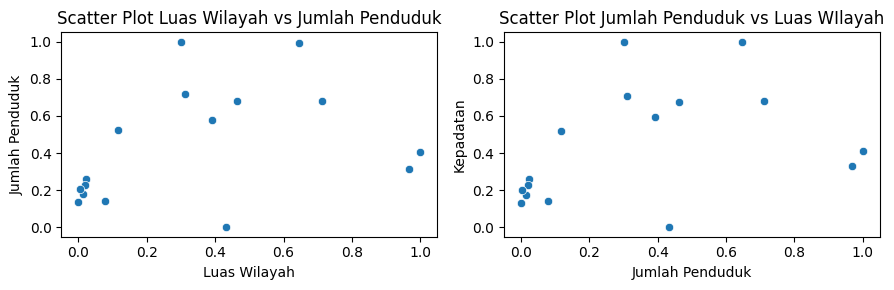

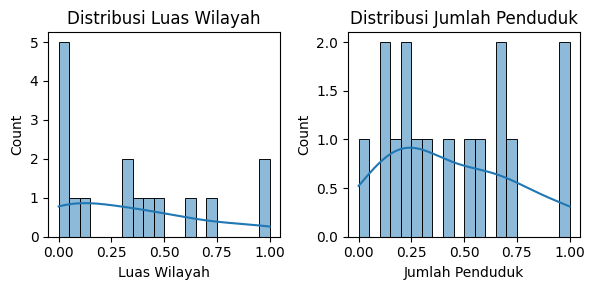

In [ ]:
import seaborn as sns

# Visualisasi scatter plot untuk melihat distribusi dan hubungan antar variabel
plt.figure(figsize=(9,3))

# Scatter plot untuk luas wilayah dan jumlah penduduk
plt.subplot(1, 2, 1)
sns.scatterplot(x='Luas Wilayah Tahun 2021', y='Jumlah Penduduk Tahun 2021', data=df)
plt.title('Scatter Plot Luas Wilayah vs Jumlah Penduduk')
plt.xlabel('Luas Wilayah')
plt.ylabel('Jumlah Penduduk')

# Scatter plot untuk jumlah penduduk dan kepadatan
plt.subplot(1, 2, 2)
sns.scatterplot(x='Luas Wilayah Tahun 2022', y='Jumlah Penduduk Tahun 2022', data=df)
plt.title('Scatter Plot Jumlah Penduduk vs Luas WIlayah')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Kepadatan')

plt.tight_layout()
plt.show()

# Visualisasi distribusi data dengan histogram
plt.figure(figsize=(9,3))

# Histogram untuk luas wilayah
plt.subplot(1, 3, 1)
sns.histplot(df['Luas Wilayah Tahun 2021'], bins=20, kde=True)
plt.title('Distribusi Luas Wilayah')
plt.xlabel('Luas Wilayah')

# Histogram untuk jumlah penduduk
plt.subplot(1, 3, 2)
sns.histplot(df['Jumlah Penduduk Tahun 2021'], bins=20, kde=True)
plt.title('Distribusi Jumlah Penduduk')
plt.xlabel('Jumlah Penduduk')

plt.tight_layout()
plt.show()

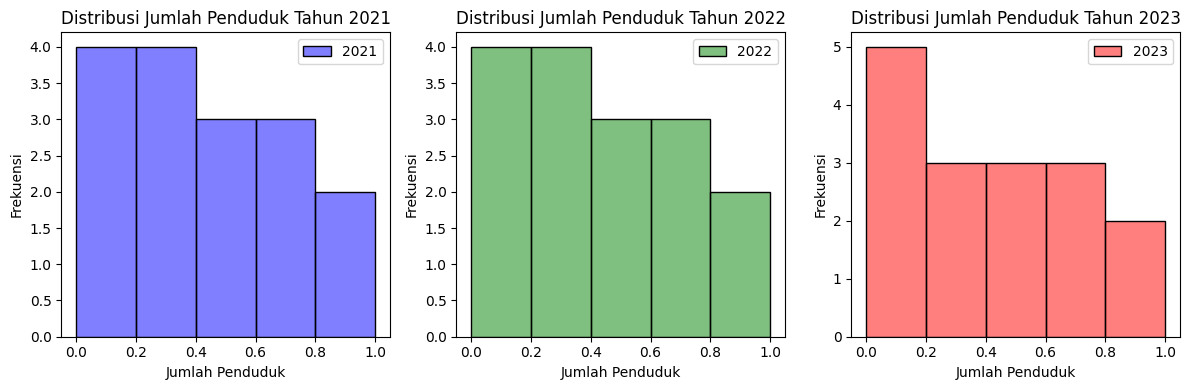

In [ ]:
plt.figure(figsize=(12, 4))

# Histogram untuk Tahun 2021
plt.subplot(1, 3, 1)
sns.histplot(df['Jumlah Penduduk Tahun 2021'], bins=5, color='blue', alpha=0.5, label='2021')
plt.title('Distribusi Jumlah Penduduk Tahun 2021')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frekuensi')
plt.legend()

# Histogram untuk Tahun 2022
plt.subplot(1, 3, 2)
sns.histplot(df['Jumlah Penduduk Tahun 2022'], bins=5, color='green', alpha=0.5, label='2022')
plt.title('Distribusi Jumlah Penduduk Tahun 2022')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frekuensi')
plt.legend()

# Histogram untuk Tahun 2023
plt.subplot(1, 3, 3)
sns.histplot(df['Jumlah Penduduk Tahun 2023'], bins=5, color='red', alpha=0.5, label='2023')
plt.title('Distribusi Jumlah Penduduk Tahun 2023')
plt.xlabel('Jumlah Penduduk')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

In [ ]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
threshold = 3  # Misalnya, threshold Z-score yang diinginkan
outliers_count = {}  # Dictionary untuk menyimpan jumlah outlier untuk setiap variabel

from scipy import stats

# Menghitung Z-score dan menentukan outlier untuk setiap variabel dalam df_numeric
for column in df_numeric.columns:
    z_scores = np.abs(stats.zscore(df_numeric[column]))
    outliers = df_numeric[column][z_scores > threshold]
    outliers_count[column] = len(outliers)

# Menampilkan jumlah outlier untuk setiap variabel
print("Jumlah outlier untuk setiap variabel:")
outliers_count

Jumlah outlier untuk setiap variabel:


{'Luas Wilayah Tahun 2021': 0,
 'Luas Wilayah Tahun 2022': 0,
 'Luas Wilayah Tahun 2023': 0,
 'Jumlah Penduduk Tahun 2021': 0,
 'Jumlah Penduduk Tahun 2022': 0,
 'Jumlah Penduduk Tahun 2023': 0}

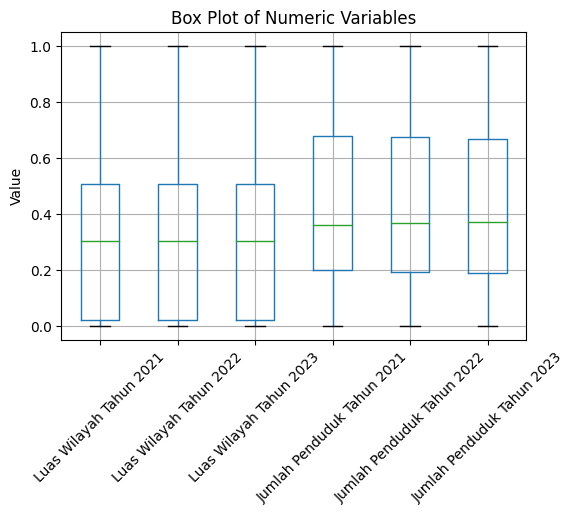

In [ ]:
# Membuat box plot untuk setiap variabel dalam df_numeric
plt.figure(figsize=(6, 4))
df_numeric.boxplot()
plt.title('Box Plot of Numeric Variables')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

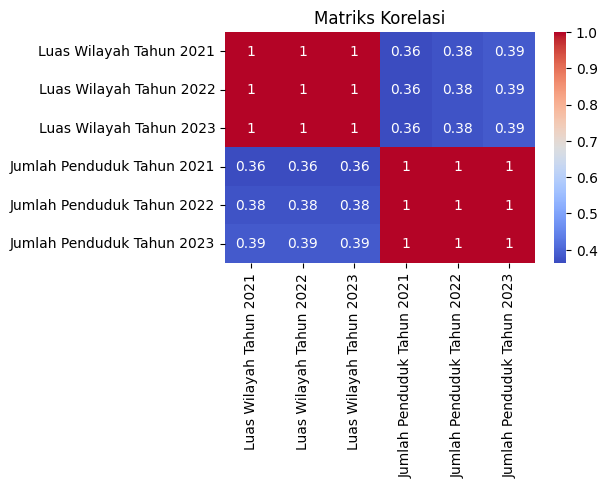

In [ ]:
# Memilih hanya kolom numerik
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Menghitung matriks korelasi
corr_matrix = df_numeric.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [ ]:
corr_matrix

,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023
Luas Wilayah Tahun 2021,1.000000,1.000000,1.000000,0.363853,0.375893,0.385389
Luas Wilayah Tahun 2022,1.000000,1.000000,1.000000,0.363853,0.375893,0.385389
Luas Wilayah Tahun 2023,1.000000,1.000000,1.000000,0.363853,0.375893,0.385389
Jumlah Penduduk Tahun 2021,0.363853,0.363853,0.363853,1.000000,0.999751,0.999259
Jumlah Penduduk Tahun 2022,0.375893,0.375893,0.375893,0.999751,1.000000,0.999859
Jumlah Penduduk Tahun 2023,0.385389,0.385389,0.385389,0.999259,0.999859,1.000000


# Density-Based Spatial Clustering of Applications with Noise (DBSCAN)


## **Clustering Tahun 2021**

### **Elbow Metode dan Silhouette Score 2021**

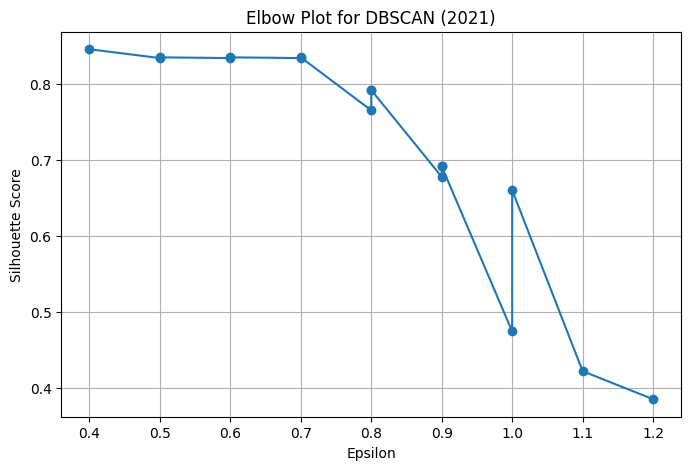

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

# Asumsi df sudah didefinisikan dan berisi kolom 'Luas Wilayah Tahun 2021' dan 'Jumlah Penduduk Tahun 2021'

# Normalisasi data
scaler = StandardScaler()
df[['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']] = scaler.fit_transform(df[['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']])

# Tentukan parameter eps dan min_samples untuk DBSCAN
eps_values = np.linspace(0.1, 1.5, 15)
min_samples_values = range(2, 7)
silhouette_scores = []

# Loop untuk berbagai nilai eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']])

        # Hanya hitung silhouette score jika ada lebih dari satu cluster yang valid
        unique_labels = set(labels)
        unique_labels.discard(-1)  # Buang noise
        if len(unique_labels) > 1:
            # Abaikan noise dalam perhitungan silhouette score
            core_samples_mask = labels != -1
            silhouette = metrics.silhouette_score(df[['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']][core_samples_mask], labels[core_samples_mask])
            silhouette_scores.append((eps, min_samples, silhouette))

# Buat elbow plot
plt.figure(figsize=(8, 5))
silhouette_scores = np.array(silhouette_scores)
plt.plot(silhouette_scores[:, 0], silhouette_scores[:, 2], marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for DBSCAN (2021)')
plt.grid(True)
plt.show()

### **Evaluasi Model Peforma DBSCAN pada Tahun 2021**

In [ ]:
# Dapatkan nilai min_samples untuk puncak silhouette score
peak_index = np.argmax(silhouette_scores[:, 2])
best_epsilon = silhouette_scores[peak_index, 0]
best_min_samples = silhouette_scores[peak_index, 1]
best_silhouette_score = silhouette_scores[peak_index, 2]
print("Evaluasi Performa Model Tahun 2021")
print("Best Epsilon:", best_epsilon)
print("Best Min Samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette_score)

Evaluasi Performa Model Tahun 2021
Best Epsilon: 0.4
Best Min Samples: 2.0
Best Silhouette Score: 0.8461373180500633


### **Hasil Scatterplot Clustering dan Hasil Cluster Kecamatan 2021**

eps=0.43, min_samples=2, Jumlah cluster: 3, Titik noise: 6
Silhouette Coefficient: 0.3596
eps=0.48, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.53, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.57, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.62, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.67, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.72, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4243
eps=0.76, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4476
eps=0.81, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4476
eps=0.86, min_samples=2, Jumlah cluster: 3, Titik noise: 3
Silhouette Coefficient: 0.4579
eps=0.91, min_samples=2, Jumlah cluster: 3, Titik noise: 3
Silhouette Coefficient: 0.4579
eps=0.95, 

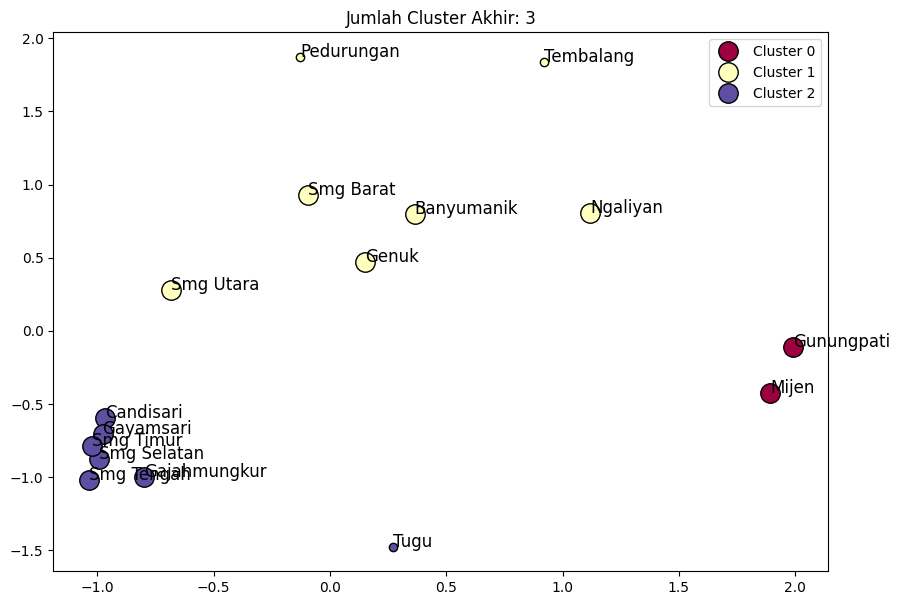

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import metrics

# Pilih fitur dan label untuk tahun 2021
X_2021 = df[['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']]
labels_true_2021 = df['Kecamatan']

# Normalisasi data
X_2021 = StandardScaler().fit_transform(X_2021)

# Inisialisasi list untuk menyimpan metrik evaluasi
best_params = []
desired_clusters_range = range(3, 6)  # Rentang jumlah cluster yang diinginkan

# Tentukan rentang parameter
epsilon = np.linspace(0.1, 1.0, 20)
minpts = np.arange(1, 11)

# Iterasi untuk rentang parameter
for eps in epsilon:
    for min_samples in minpts:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_2021)
        labels = db.labels_

        # Hitung jumlah cluster dan titik noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ in desired_clusters_range:  # Hanya pertimbangkan jika ada cluster dalam rentang yang diinginkan
            silhouette_avg = metrics.silhouette_score(X_2021, labels)
            best_params.append((eps, min_samples, n_clusters_, n_noise_, silhouette_avg))
            print(f"eps={eps:.2f}, min_samples={min_samples}, Jumlah cluster: {n_clusters_}, Titik noise: {n_noise_}")
            print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

# Temukan parameter terbaik berdasarkan nilai silhouette
if best_params:
    best_params.sort(key=lambda x: x[4], reverse=True)  # Urutkan berdasarkan nilai silhouette secara menurun
    best_eps, best_min_samples, _, _, _ = best_params[0]

    # Plot hasil untuk parameter terbaik
    db = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_2021)
    labels = db.labels_
    unique_labels = set(labels)

    # Tangani titik noise dengan menetapkan mereka ke cluster terdekat
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    noise_points = X_2021[labels == -1]
    non_noise_points = X_2021[labels != -1]
    non_noise_labels = labels[labels != -1]

    if len(noise_points) > 0:
        # Hitung jarak dari setiap titik noise ke setiap titik non-noise
        distances = distance.cdist(noise_points, non_noise_points, 'euclidean')
        nearest_indices = distances.argmin(axis=1)
        nearest_labels = non_noise_labels[nearest_indices]

        # Tetapkan titik noise ke cluster terdekat
        labels[labels == -1] = nearest_labels

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    # Plot hasil untuk clustering yang digabungkan
    plt.figure(figsize=(10, 7))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        xy = X_2021[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f'Cluster {k}')

        xy = X_2021[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        for i, txt in enumerate(df['Kecamatan'][class_member_mask]):
            plt.annotate(txt, (X_2021[class_member_mask][:, 0][i], X_2021[class_member_mask][:, 1][i]),
                         fontsize=12, color='black')

    plt.title(f'Jumlah Cluster Akhir: {len(unique_labels)}')
    plt.legend()
    plt.show()

In [ ]:
df['Cluster 2021'] = labels
Cluster23 = df[['Kecamatan', 'Cluster 2021']]
Cluster23

,Kecamatan,Cluster 2021
1,Mijen,0
2,Gunungpati,0
3,Banyumanik,1
4,Gajahmungkur,2
5,Smg Selatan,2
6,Candisari,2
7,Tembalang,1
8,Pedurungan,1
9,Genuk,1
10,Gayamsari,2


In [ ]:
# Menghitung jumlah kecamatan dalam setiap cluster
jumlah2021 = df['Cluster 2021'].value_counts().reset_index()
jumlah2021.columns = ['Cluster 2021', 'Jumlah Kecamatan']
jumlah2021

,Cluster 2021,Jumlah Kecamatan
0,1,7
1,2,7
2,0,2


In [ ]:
df.head()

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Cluster 2021
1,Mijen,1.891227,0.967043,0.967043,-0.422784,0.328795,0.340183,0
2,Gunungpati,1.991039,1.000000,1.000000,-0.108597,0.408944,0.405635,0
3,Banyumanik,0.363815,0.462712,0.462712,0.797992,0.674809,0.664203,1
4,Gajahmungkur,-0.799709,0.078531,0.078531,-0.997199,0.139719,0.136641,2
5,Smg Selatan,-0.993060,0.014689,0.014689,-0.876748,0.175392,0.171954,2


### **Tahun 2022**

### **Elbow Metode dan Silhouette Score 2022**

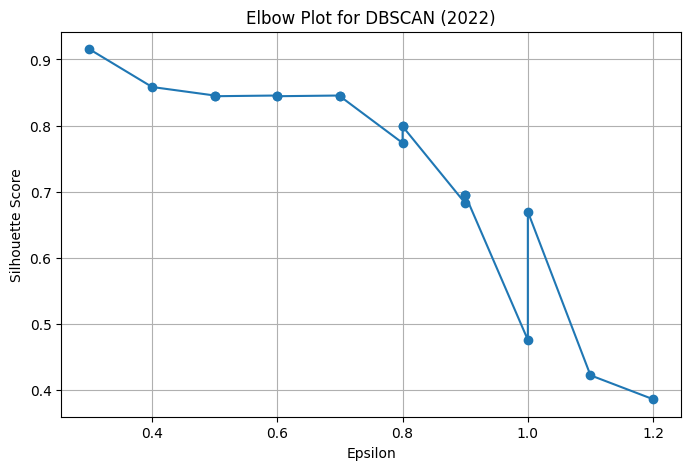

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

# Asumsi df sudah didefinisikan dan berisi kolom 'Luas Wilayah Tahun 2022' dan 'Jumlah Penduduk Tahun 2022'

# Normalisasi data
scaler = StandardScaler()
df[['Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']] = scaler.fit_transform(df[['Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']])

# Tentukan parameter eps dan min_samples untuk DBSCAN
eps_values = np.linspace(0.1, 1.5, 15)
min_samples_values = range(2, 7)
silhouette_scores = []

# Loop untuk berbagai nilai eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']])

        # Hanya hitung silhouette score jika ada lebih dari satu cluster yang valid
        unique_labels = set(labels)
        unique_labels.discard(-1)  # Buang noise
        if len(unique_labels) > 1:
            # Abaikan noise dalam perhitungan silhouette score
            core_samples_mask = labels != -1
            silhouette = metrics.silhouette_score(df[['Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']][core_samples_mask], labels[core_samples_mask])
            silhouette_scores.append((eps, min_samples, silhouette))

# Buat elbow plot
plt.figure(figsize=(8, 5))
silhouette_scores = np.array(silhouette_scores)
plt.plot(silhouette_scores[:, 0], silhouette_scores[:, 2], marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for DBSCAN (2022)')
plt.grid(True)
plt.show()

### **Evaluasi Model Peforma DBSCAN pada Tahun 2022**

In [ ]:
# Dapatkan nilai min_samples untuk puncak silhouette score
peak_index = np.argmax(silhouette_scores[:, 2])
best_epsilon = silhouette_scores[peak_index, 0]
best_min_samples = silhouette_scores[peak_index, 1]
best_silhouette_score = silhouette_scores[peak_index, 2]
print("Evaluasi Performa Model Tahun 2022")
print("Best Epsilon:", best_epsilon)
print("Best Min Samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette_score)

Evaluasi Performa Model Tahun 2022
Best Epsilon: 0.3
Best Min Samples: 2.0
Best Silhouette Score: 0.9154090133602455


### **Hasil Scatterplot Clustering dan Hasil Cluster Kecamatan 2022**

eps=0.38, min_samples=2, Jumlah cluster: 3, Titik noise: 6
Silhouette Coefficient: 0.3657
eps=0.43, min_samples=2, Jumlah cluster: 3, Titik noise: 6
Silhouette Coefficient: 0.3657
eps=0.48, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.53, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.57, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.62, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.67, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.72, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4328
eps=0.76, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4537
eps=0.81, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4537
eps=0.86, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4537
eps=0.91, 

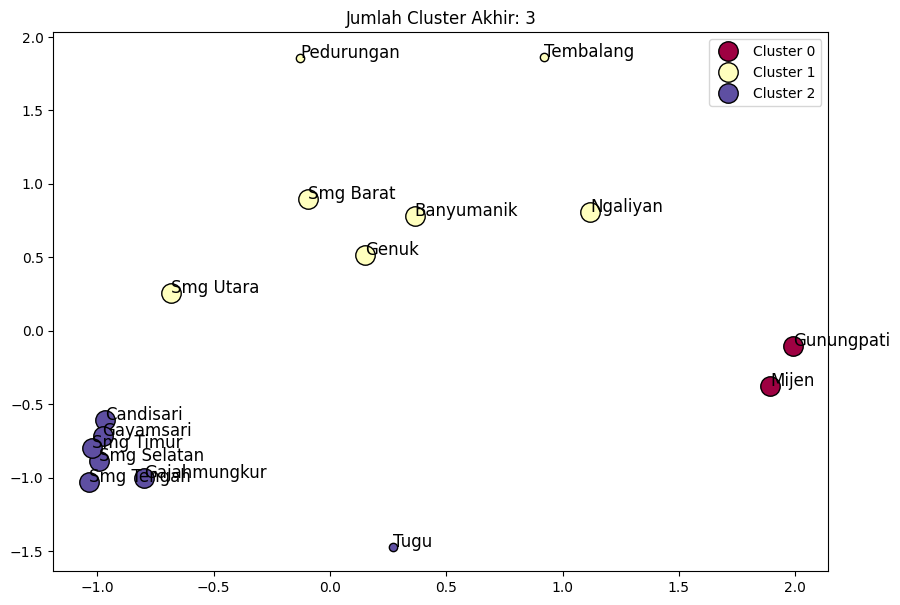

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn import metrics

# Pilih fitur dan label untuk tahun 2022
X_2022 = df[['Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']]
labels_true_2022 = df['Kecamatan']

# Normalisasi data
X_2022 = StandardScaler().fit_transform(X_2022)

# Inisialisasi list untuk menyimpan metrik evaluasi
best_params = []
desired_clusters_range = range(3, 6)  # Rentang jumlah cluster yang diinginkan

# Tentukan rentang parameter
epsilon = np.linspace(0.1, 1.0, 20)
minpts = np.arange(1, 11)

# Iterasi untuk rentang parameter
for eps in epsilon:
    for min_samples in minpts:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_2022)
        labels = db.labels_

        # Hitung jumlah cluster dan titik noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ in desired_clusters_range:  # Hanya pertimbangkan jika ada cluster dalam rentang yang diinginkan
            silhouette_avg = metrics.silhouette_score(X_2022, labels)
            best_params.append((eps, min_samples, n_clusters_, n_noise_, silhouette_avg))
            print(f"eps={eps:.2f}, min_samples={min_samples}, Jumlah cluster: {n_clusters_}, Titik noise: {n_noise_}")
            print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

# Temukan parameter terbaik berdasarkan nilai silhouette
if best_params:
    best_params.sort(key=lambda x: x[4], reverse=True)  # Urutkan berdasarkan nilai silhouette secara menurun
    best_eps, best_min_samples, _, _, _ = best_params[0]

    # Plot hasil untuk parameter terbaik
    db = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_2022)
    labels = db.labels_
    unique_labels = set(labels)

    # Tangani titik noise dengan menetapkan mereka ke cluster terdekat
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    noise_points = X_2022[labels == -1]
    non_noise_points = X_2022[labels != -1]
    non_noise_labels = labels[labels != -1]

    if len(noise_points) > 0:
        # Hitung jarak dari setiap titik noise ke setiap titik non-noise
        distances = distance.cdist(noise_points, non_noise_points, 'euclidean')
        nearest_indices = distances.argmin(axis=1)
        nearest_labels = non_noise_labels[nearest_indices]

        # Tetapkan titik noise ke cluster terdekat
        labels[labels == -1] = nearest_labels

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    # Plot hasil untuk clustering yang digabungkan
    plt.figure(figsize=(10, 7))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        xy = X_2022[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f'Cluster {k}')

        xy = X_2022[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        for i, txt in enumerate(df['Kecamatan'][class_member_mask]):
            plt.annotate(txt, (X_2022[class_member_mask][:, 0][i], X_2022[class_member_mask][:, 1][i]),
                         fontsize=12, color='black')

    plt.title(f'Jumlah Cluster Akhir: {len(unique_labels)}')
    plt.legend()
    plt.show()

In [ ]:
df['Cluster 2022'] = labels
Cluster22 = df[['Kecamatan', 'Cluster 2022']]
Cluster22

,Kecamatan,Cluster 2022
1,Mijen,0
2,Gunungpati,0
3,Banyumanik,1
4,Gajahmungkur,2
5,Smg Selatan,2
6,Candisari,2
7,Tembalang,1
8,Pedurungan,1
9,Genuk,1
10,Gayamsari,2


In [ ]:
# Menghitung jumlah kecamatan dalam setiap cluster
jumlah2022 = df['Cluster 2022'].value_counts().reset_index()
jumlah2022.columns = ['Cluster 2022', 'Jumlah Kecamatan']
jumlah2022

,Cluster 2022,Jumlah Kecamatan
0,1,7
1,2,7
2,0,2


In [ ]:
df.head()

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Cluster 2021,Cluster 2022
1,Mijen,1.891227,1.891227,0.967043,-0.422784,-0.372732,0.340183,0,0
2,Gunungpati,1.991039,1.991039,1.000000,-0.108597,-0.105486,0.405635,0,0
3,Banyumanik,0.363815,0.363815,0.462712,0.797992,0.781005,0.664203,1,1
4,Gajahmungkur,-0.799709,-0.799709,0.078531,-0.997199,-1.003181,0.136641,2,2
5,Smg Selatan,-0.993060,-0.993060,0.014689,-0.876748,-0.884234,0.171954,2,2


### **Tahun 2023**

##### **Elbow Metode dan Silhouette Score 2023**

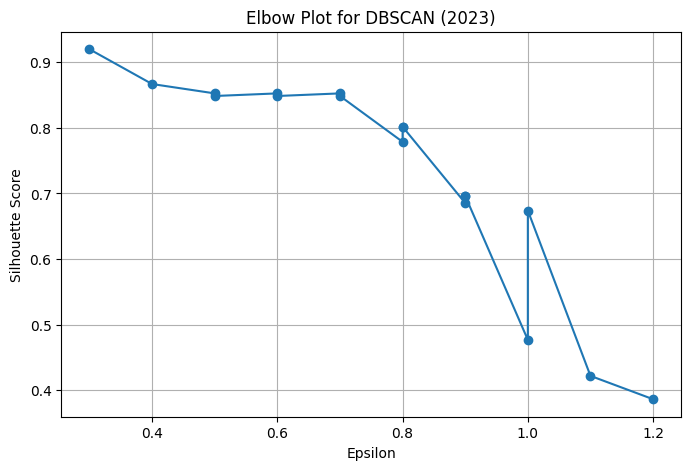

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn import metrics

# Asumsi df sudah didefinisikan dan berisi kolom 'Luas Wilayah Tahun 2023' dan 'Jumlah Penduduk Tahun 2023'

# Normalisasi data
scaler = StandardScaler()
df[['Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']] = scaler.fit_transform(df[['Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']])

# Tentukan parameter eps dan min_samples untuk DBSCAN
eps_values = np.linspace(0.1, 1.5, 15)
min_samples_values = range(2, 7)
silhouette_scores = []

# Loop untuk berbagai nilai eps dan min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df[['Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']])

        # Hanya hitung silhouette score jika ada lebih dari satu cluster yang valid
        unique_labels = set(labels)
        unique_labels.discard(-1)  # Buang noise
        if len(unique_labels) > 1:
            # Abaikan noise dalam perhitungan silhouette score
            core_samples_mask = labels != -1
            silhouette = metrics.silhouette_score(df[['Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']][core_samples_mask], labels[core_samples_mask])
            silhouette_scores.append((eps, min_samples, silhouette))

# Buat elbow plot
plt.figure(figsize=(8, 5))
silhouette_scores = np.array(silhouette_scores)
plt.plot(silhouette_scores[:, 0], silhouette_scores[:, 2], marker='o')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Elbow Plot for DBSCAN (2023)')
plt.grid(True)
plt.show()

#### **Evaluasi Model Peforma DBSCAN pada Tahun 2023**

In [ ]:
# Dapatkan nilai min_samples untuk puncak silhouette score
peak_index = np.argmax(silhouette_scores[:, 2])
best_epsilon = silhouette_scores[peak_index, 0]
best_min_samples = silhouette_scores[peak_index, 1]
best_silhouette_score = silhouette_scores[peak_index, 2]
print("Evaluasi Performa Model Tahun 2023")
print("Best Epsilon:", best_epsilon)
print("Best Min Samples:", best_min_samples)
print("Best Silhouette Score:", best_silhouette_score)

Evaluasi Performa Model Tahun 2023
Best Epsilon: 0.3
Best Min Samples: 2.0
Best Silhouette Score: 0.9196197663397739


### **Hasil Scatterplot Clustering dan Hasil Cluster Kecamatan 2023**

eps=0.34, min_samples=2, Jumlah cluster: 3, Titik noise: 6
Silhouette Coefficient: 0.3709
eps=0.38, min_samples=2, Jumlah cluster: 3, Titik noise: 6
Silhouette Coefficient: 0.3709
eps=0.43, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.48, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.53, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.57, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.62, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.67, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.72, min_samples=2, Jumlah cluster: 3, Titik noise: 5
Silhouette Coefficient: 0.4383
eps=0.76, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4579
eps=0.81, min_samples=2, Jumlah cluster: 3, Titik noise: 4
Silhouette Coefficient: 0.4579
eps=0.86, 

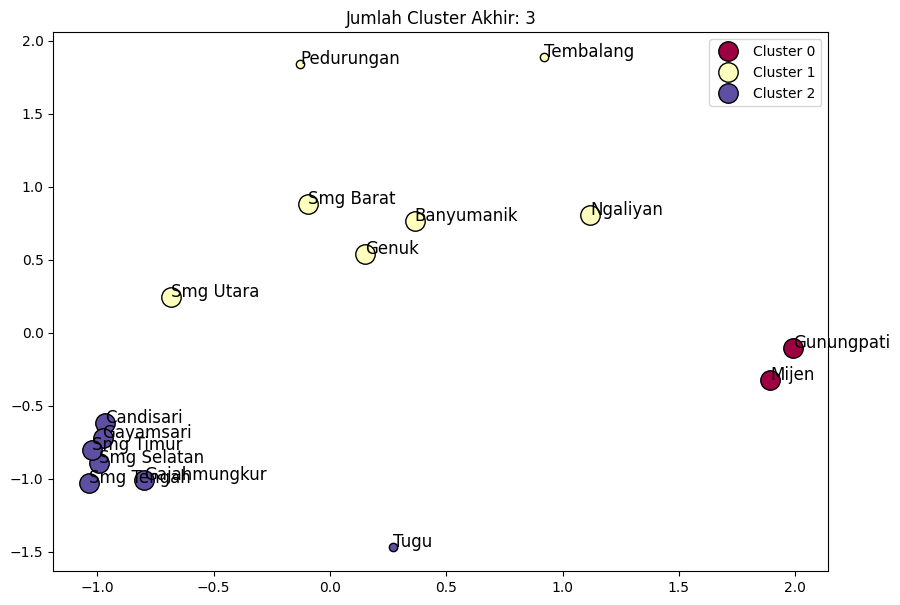

In [ ]:
# Pilih fitur dan label untuk tahun 2023
X_2023 = df[['Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']]
labels_true_2023 = df['Kecamatan']

# Normalisasi data
X_2023 = StandardScaler().fit_transform(X_2023)

# Inisialisasi list untuk menyimpan metrik evaluasi
best_params = []
desired_clusters_range = range(3, 6)  # Rentang jumlah cluster yang diinginkan

# Tentukan rentang parameter
epsilon = np.linspace(0.1, 1.0, 20)
minpts = np.arange(1, 11)

# Iterasi untuk rentang parameter
for eps in epsilon:
    for min_samples in minpts:
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_2023)
        labels = db.labels_

        # Hitung jumlah cluster dan titik noise
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)

        if n_clusters_ in desired_clusters_range:  # Hanya pertimbangkan jika ada cluster dalam rentang yang diinginkan
            silhouette_avg = metrics.silhouette_score(X_2023, labels)
            best_params.append((eps, min_samples, n_clusters_, n_noise_, silhouette_avg))
            print(f"eps={eps:.2f}, min_samples={min_samples}, Jumlah cluster: {n_clusters_}, Titik noise: {n_noise_}")
            print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

# Temukan parameter terbaik berdasarkan nilai silhouette
if best_params:
    best_params.sort(key=lambda x: x[4], reverse=True)  # Urutkan berdasarkan nilai silhouette secara menurun
    best_eps, best_min_samples, _, _, _ = best_params[0]

    # Plot hasil untuk parameter terbaik
    db = DBSCAN(eps=best_eps, min_samples=best_min_samples).fit(X_2023)
    labels = db.labels_
    unique_labels = set(labels)

    # Tangani titik noise dengan menetapkan mereka ke cluster terdekat
    core_samples_mask = np.zeros_like(labels, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True

    noise_points = X_2023[labels == -1]
    non_noise_points = X_2023[labels != -1]
    non_noise_labels = labels[labels != -1]

    if len(noise_points) > 0:
        # Hitung jarak dari setiap titik noise ke setiap titik non-noise
        distances = distance.cdist(noise_points, non_noise_points, 'euclidean')
        nearest_indices = distances.argmin(axis=1)
        nearest_labels = non_noise_labels[nearest_indices]

        # Tetapkan titik noise ke cluster terdekat
        labels[labels == -1] = nearest_labels

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    # Plot hasil untuk clustering yang digabungkan
    plt.figure(figsize=(10, 7))
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        xy = X_2023[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14, label=f'Cluster {k}')

        xy = X_2023[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

        for i, txt in enumerate(df['Kecamatan'][class_member_mask]):
            plt.annotate(txt, (X_2023[class_member_mask][:, 0][i], X_2023[class_member_mask][:, 1][i]),
                         fontsize=12, color='black')

    plt.title(f'Jumlah Cluster Akhir: {len(unique_labels)}')
    plt.legend()
    plt.show()

In [ ]:
# Menampilkan evaluasi model
if best_params:
    print("\nEvaluasi Performa Model Tahun 2023")
    print("Best Epsilon:", best_eps)
    print("Best Min Samples:", best_min_samples)
    print("Best Silhouette Score:", best_silhouette_score)


Evaluasi Performa Model Tahun 2023
Best Epsilon: 0.9052631578947369
Best Min Samples: 2
Best Silhouette Score: 0.9196197663397739


In [ ]:
# Cetak DataFrame untuk menampilkan kecamatan dan clusternya
df['Cluster 2023'] = labels
Cluster23 = df[['Kecamatan', 'Cluster 2023']].copy()
Cluster23

,Kecamatan,Cluster 2023
1,Mijen,0
2,Gunungpati,0
3,Banyumanik,1
4,Gajahmungkur,2
5,Smg Selatan,2
6,Candisari,2
7,Tembalang,1
8,Pedurungan,1
9,Genuk,1
10,Gayamsari,2


In [ ]:
# Menghitung jumlah kecamatan dalam setiap cluster
jumlah2023 = df['Cluster 2023'].value_counts().reset_index()
jumlah2023.columns = ['Cluster 2023', 'Jumlah Kecamatan']
jumlah2023

,Cluster 2023,Jumlah Kecamatan
0,1,7
1,2,7
2,0,2


##### **Hasil Scatterplot Clustering dan Hasil Cluster Kecamatan 2023**

In [ ]:
# Menambahkan kolom 'Cluster 2021' ke dalam dataframe
data.insert(loc=len(data.columns), column='Cluster 2021', value=df['Cluster 2021'])
# Menambahkan kolom 'Cluster 2022' ke dalam dataframe
data.insert(loc=len(data.columns), column='Cluster 2022', value=df['Cluster 2022'])
# Menambahkan kolom 'Cluster 2023' ke dalam dataframe
data.insert(loc=len(data.columns), column='Cluster 2023', value=df['Cluster 2023'])
data.head()

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Cluster 2021,Cluster 2022,Cluster 2023
1,Mijen,5652,5652,5652,83321,85818,89948,0,0,0
2,Gunungpati,5827,5827,5827,98343,98674,100752,0,0,0
3,Banyumanik,2974,2974,2974,141689,141319,143433,1,1,1
4,Gajahmungkur,934,934,934,55857,55490,56350,2,2,2
5,Smg Selatan,595,595,595,61616,61212,62179,2,2,2


**Memeriksa Perubahan Cluster untuk setiap Kecamatan dari tahun 2021 hingga 2023**
setiap kecamatan diambil satu per satu, dan kemudian nilai 'Cluster' untuk tahun 2021, 2022, dan 2023 dibandingkan. Jika terdapat perbedaan di antara tahun-tahun tersebut, maka dicetak bahwa kecamatan tersebut mengalami perubahan cluster.

In [ ]:
# Memeriksa perubahan cluster untuk setiap kecamatan dari tahun 2021 hingga 2023
for kecamatan in df['Kecamatan']:
    cluster_2021 = df[df['Kecamatan'] == kecamatan]['Cluster 2021'].values[0]
    cluster_2022 = df[df['Kecamatan'] == kecamatan]['Cluster 2022'].values[0]
    cluster_2023 = df[df['Kecamatan'] == kecamatan]['Cluster 2023'].values[0]

    if cluster_2021 != cluster_2022 or cluster_2021 != cluster_2023 or cluster_2022 != cluster_2023:
        print(f"Kecamatan :{kecamatan}, MENGALAMI perubahan cluster dari tahun 2021 hingga 2023")
    else:
        print(f"Kecamatan :{kecamatan}, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023")

Kecamatan :Mijen, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Gunungpati, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Banyumanik, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Gajahmungkur, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Smg Selatan, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Candisari, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Tembalang, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Pedurungan, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Genuk, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Gayamsari, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Smg Timur, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hingga 2023
Kecamatan :Smg Utara, TIDAK MENGALAMI perubahan cluster dari tahun 2021 hing

Pada seluruh kecamatan di  Kota Semarang menunjukkan bahwa kecamatan-kecamatan tersebut tetap berada di cluster yang sama dari tahun 2021 hingga 2023.

In [ ]:
data

,Kecamatan,Luas Wilayah Tahun 2021,Luas Wilayah Tahun 2022,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Cluster 2021,Cluster 2022,Cluster 2023
1,Mijen,5652,5652,5652,83321,85818,89948,0,0,0
2,Gunungpati,5827,5827,5827,98343,98674,100752,0,0,0
3,Banyumanik,2974,2974,2974,141689,141319,143433,1,1,1
4,Gajahmungkur,934,934,934,55857,55490,56350,2,2,2
5,Smg Selatan,595,595,595,61616,61212,62179,2,2,2
6,Candisari,640,640,640,74952,74461,75614,2,2,2
7,Tembalang,3947,3947,3947,191560,193480,198862,1,1,1
8,Pedurungan,2111,2111,2111,193128,193125,196526,1,1,1
9,Genuk,2598,2598,2598,125967,128696,132473,1,1,1
10,Gayamsari,622,622,622,69792,69334,70409,2,2,2


## **Analisis Lanjutan**

In [ ]:
print("Changes in clusters from 2021 to 2022:")
for kecamatan in df['Kecamatan']:
    cluster_2021 = df[df['Kecamatan'] == kecamatan]['Cluster 2021'].values[0]
    cluster_2022 = df[df['Kecamatan'] == kecamatan]['Cluster 2022'].values[0]
    if cluster_2021 != cluster_2022:
        print(f"{kecamatan}: {cluster_2021} -> {cluster_2022}")

print("\nChanges in clusters from 2022 to 2023:")
for kecamatan in df['Kecamatan']:
    cluster_2022 = df[df['Kecamatan'] == kecamatan]['Cluster 2022'].values[0]
    cluster_2023 = df[df['Kecamatan'] == kecamatan]['Cluster 2023'].values[0]
    if cluster_2022 != cluster_2023:
        print(f"{kecamatan}: {cluster_2022} -> {cluster_2023}")


Changes in clusters from 2021 to 2022:

Changes in clusters from 2022 to 2023:


In [ ]:
for year in range(2021, 2024):
    next_year = year + 1
    if next_year <= 2023:
        print(f"\nGrowth analysis from {year} to {next_year}:")
        df[f'Growth {year}-{next_year}'] = df[f'Jumlah Penduduk Tahun {next_year}'] - df[f'Jumlah Penduduk Tahun {year}']
        growth_means = df.groupby(f'Cluster {year}')[f'Growth {year}-{next_year}'].mean()
        print(growth_means)



Growth analysis from 2021 to 2022:
Cluster 2021
0    0.026582
1   -0.001727
2   -0.005868
Name: Growth 2021-2022, dtype: float64

Growth analysis from 2022 to 2023:
Cluster 2022
0    0.024197
1   -0.002676
2   -0.004238
Name: Growth 2022-2023, dtype: float64


In [ ]:
variables_of_interest = ['Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']

for year in range(2021, 2023):
    next_year = year + 1
    for var in variables_of_interest:
        growth_var = df.groupby(f'Cluster {year}')[var].mean() - df.groupby(f'Cluster {next_year}')[var].mean()
        growth_var.columns = [f'Growth {year}-{next_year}']
        print(f"\nPerubahan rata-rata {var} dari {year} ke {next_year}:")
        print(growth_var)



Perubahan rata-rata Luas Wilayah Tahun 2021 dari 2021 ke 2022:
Cluster 2021
0    0.0
1    0.0
2    0.0
Name: Luas Wilayah Tahun 2021, dtype: float64

Perubahan rata-rata Jumlah Penduduk Tahun 2021 dari 2021 ke 2022:
Cluster 2021
0    0.0
1    0.0
2    0.0
Name: Jumlah Penduduk Tahun 2021, dtype: float64

Perubahan rata-rata Luas Wilayah Tahun 2021 dari 2022 ke 2023:
Cluster 2022
0    0.0
1    0.0
2    0.0
Name: Luas Wilayah Tahun 2021, dtype: float64

Perubahan rata-rata Jumlah Penduduk Tahun 2021 dari 2022 ke 2023:
Cluster 2022
0    0.0
1    0.0
2    0.0
Name: Jumlah Penduduk Tahun 2021, dtype: float64


In [ ]:
policy_year = 2022
policy_clusters = df[f'Cluster {policy_year}']

# Analyze impact by comparing with previous and next year
previous_year = policy_year - 1
next_year = policy_year + 1

impact_analysis = pd.DataFrame()
impact_analysis['Kecamatan'] = df['Kecamatan']
impact_analysis[f'Cluster {previous_year}'] = df[f'Cluster {previous_year}']
impact_analysis[f'Cluster {policy_year}'] = df[f'Cluster {policy_year}']
impact_analysis[f'Cluster {next_year}'] = df[f'Cluster {next_year}']

print("\nImpact analysis of policy implemented in 2022:")
print(impact_analysis)



Impact analysis of policy implemented in 2022:
       Kecamatan  Cluster 2021  Cluster 2022  Cluster 2023
1          Mijen             0             0             0
2     Gunungpati             0             0             0
3     Banyumanik             1             1             1
4   Gajahmungkur             2             2             2
5    Smg Selatan             2             2             2
6      Candisari             2             2             2
7      Tembalang             1             1             1
8     Pedurungan             1             1             1
9          Genuk             1             1             1
10     Gayamsari             2             2             2
11     Smg Timur             2             2             2
12     Smg Utara             1             1             1
13    Smg Tengah             2             2             2
14     Smg Barat             1             1             1
15          Tugu             2             2             2
16      

In [ ]:
# Filter data untuk cluster 1 saja pada tahun 2021
c1_2021 = data[data['Cluster 2021'] == 0]

# Filter data untuk cluster 1 saja pada tahun 2022
c1_2022 = data[data['Cluster 2022'] == 0]

# Filter data untuk cluster 1 saja pada tahun 2023
c1_2023 = data[data['Cluster 2023'] == 0]

# Tampilkan data yang telah difilter untuk setiap tahun
print("Data Cluster 1 pada Tahun 2021:")
display(c1_2021[['Kecamatan', 'Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']])

print("\nData Cluster 1 pada Tahun 2022:")
display(c1_2022[['Kecamatan', 'Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']])

print("\nData Cluster 1 pada Tahun 2023:")
c1_2023[['Kecamatan', 'Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']]

Data Cluster 1 pada Tahun 2021:


,Kecamatan,Luas Wilayah Tahun 2021,Jumlah Penduduk Tahun 2021
1,Mijen,5652,83321
2,Gunungpati,5827,98343



Data Cluster 1 pada Tahun 2022:


,Kecamatan,Luas Wilayah Tahun 2022,Jumlah Penduduk Tahun 2022
1,Mijen,5652,85818
2,Gunungpati,5827,98674



Data Cluster 1 pada Tahun 2023:


,Kecamatan,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2023
1,Mijen,5652,89948
2,Gunungpati,5827,100752


In [ ]:
# Filter data untuk cluster 2 saja pada tahun 2021
c2_2021 = data[data['Cluster 2021'] == 1]

# Filter data untuk cluster 2 saja pada tahun 2022
c2_2022 = data[data['Cluster 2022'] == 1]

# Filter data untuk cluster 2 saja pada tahun 2023
c2_2023 = data[data['Cluster 2023'] == 1]

# Tampilkan data yang telah difilter untuk setiap tahun
print("Data Cluster 2 pada Tahun 2021:")
display(c2_2021[['Kecamatan', 'Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']])

print("\nData Cluster 2 pada Tahun 2022:")
display(c2_2022[['Kecamatan', 'Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']])

print("\nData Cluster 2 pada Tahun 2023:")
c2_2023[['Kecamatan', 'Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']]

Data Cluster 2 pada Tahun 2021:


,Kecamatan,Luas Wilayah Tahun 2021,Jumlah Penduduk Tahun 2021
3,Banyumanik,2974,141689
7,Tembalang,3947,191560
8,Pedurungan,2111,193128
9,Genuk,2598,125967
12,Smg Utara,1139,116820
14,Smg Barat,2168,147885
16,Ngaliyan,4299,142131



Data Cluster 2 pada Tahun 2022:


,Kecamatan,Luas Wilayah Tahun 2022,Jumlah Penduduk Tahun 2022
3,Banyumanik,2974,141319
7,Tembalang,3947,193480
8,Pedurungan,2111,193125
9,Genuk,2598,128696
12,Smg Utara,1139,116054
14,Smg Barat,2168,146915
16,Ngaliyan,4299,142553



Data Cluster 2 pada Tahun 2023:


,Kecamatan,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2023
3,Banyumanik,2974,143433
7,Tembalang,3947,198862
8,Pedurungan,2111,196526
9,Genuk,2598,132473
12,Smg Utara,1139,117887
14,Smg Barat,2168,149326
16,Ngaliyan,4299,145495


In [ ]:
# Filter data untuk cluster 3 saja pada tahun 2021
c3_2021 = data[data['Cluster 2021'] == 2]

# Filter data untuk cluster 3 saja pada tahun 2022
c3_2022 = data[data['Cluster 2022'] == 2]

# Filter data untuk cluster 3 saja pada tahun 2023
c3_2023 = data[data['Cluster 2023'] == 2]

# Tampilkan data yang telah difilter untuk setiap tahun
print("Data Cluster 3 pada Tahun 2021:")
display(c3_2021[['Kecamatan', 'Luas Wilayah Tahun 2021', 'Jumlah Penduduk Tahun 2021']])

print("\nData Cluster 3 pada Tahun 2022:")
display(c3_2022[['Kecamatan', 'Luas Wilayah Tahun 2022', 'Jumlah Penduduk Tahun 2022']])

print("\nData Cluster 3 pada Tahun 2023:")
c3_2023[['Kecamatan', 'Luas Wilayah Tahun 2023', 'Jumlah Penduduk Tahun 2023']]

Data Cluster 3 pada Tahun 2021:


,Kecamatan,Luas Wilayah Tahun 2021,Jumlah Penduduk Tahun 2021
4,Gajahmungkur,934,55857
5,Smg Selatan,595,61616
6,Candisari,640,74952
10,Gayamsari,622,69792
11,Smg Timur,542,65859
13,Smg Tengah,517,54696
15,Tugu,2813,32948



Data Cluster 3 pada Tahun 2022:


,Kecamatan,Luas Wilayah Tahun 2022,Jumlah Penduduk Tahun 2022
4,Gajahmungkur,934,55490
5,Smg Selatan,595,61212
6,Candisari,640,74461
10,Gayamsari,622,69334
11,Smg Timur,542,65427
13,Smg Tengah,517,54338
15,Tugu,2813,33079



Data Cluster 3 pada Tahun 2023:


,Kecamatan,Luas Wilayah Tahun 2023,Jumlah Penduduk Tahun 2023
4,Gajahmungkur,934,56350
5,Smg Selatan,595,62179
6,Candisari,640,75614
10,Gayamsari,622,70409
11,Smg Timur,542,66481
13,Smg Tengah,517,55213
15,Tugu,2813,33795


In [ ]:
# Menghitung kepadatan penduduk untuk tahun 2021
data['Kepadatan Penduduk 2021'] = data['Jumlah Penduduk Tahun 2021'] / data['Luas Wilayah Tahun 2021']

# Menghitung kepadatan penduduk untuk tahun 2022
data['Kepadatan Penduduk 2022'] = data['Jumlah Penduduk Tahun 2022'] / data['Luas Wilayah Tahun 2022']

# Menghitung kepadatan penduduk untuk tahun 2023
data['Kepadatan Penduduk 2023'] = data['Jumlah Penduduk Tahun 2023'] / data['Luas Wilayah Tahun 2023']

# Menampilkan hasil perhitungan
data[['Kecamatan', 'Kepadatan Penduduk 2021', 'Kepadatan Penduduk 2022', 'Kepadatan Penduduk 2023']]

,Kecamatan,Kepadatan Penduduk 2021,Kepadatan Penduduk 2022,Kepadatan Penduduk 2023
1,Mijen,14.741861,15.183652,15.914367
2,Gunungpati,16.877124,16.933928,17.290544
3,Banyumanik,47.642569,47.518157,48.228985
4,Gajahmungkur,59.804069,59.411135,60.331906
5,Smg Selatan,103.556303,102.877311,104.502521
6,Candisari,117.112500,116.345313,118.146875
7,Tembalang,48.533063,49.019508,50.383076
8,Pedurungan,91.486499,91.485078,93.096163
9,Genuk,48.486143,49.536567,50.990377
10,Gayamsari,112.205788,111.469453,113.197749


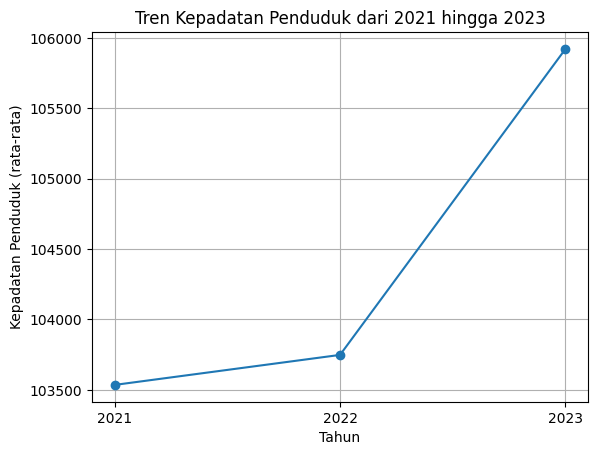

In [ ]:
# Tren Kepadatan Penduduk dari Tahun 2021 hingga 2023
population_density_trend = data[['Jumlah Penduduk Tahun 2021', 'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023']].mean()
years = [2021, 2022, 2023]
plt.plot(years, population_density_trend, marker='o')
plt.xlabel('Tahun')
plt.ylabel('Kepadatan Penduduk (rata-rata)')
plt.title('Tren Kepadatan Penduduk dari 2021 hingga 2023')
plt.xticks(years)  # Memastikan hanya tahun-tahun yang ditampilkan pada sumbu x
plt.grid(True)
plt.show()

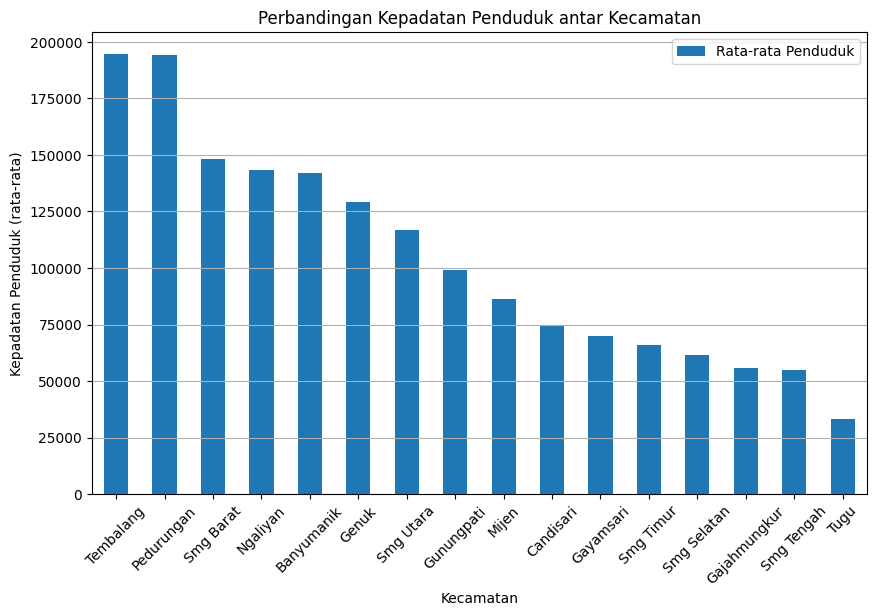

In [ ]:
# Perbandingan Kepadatan Penduduk antar Kecamatan
population_density_comparison = data[['Kecamatan', 'Jumlah Penduduk Tahun 2021', 'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023']].set_index('Kecamatan')
population_density_comparison['Rata-rata Penduduk'] = population_density_comparison.mean(axis=1)
population_density_comparison.sort_values(by='Rata-rata Penduduk', ascending=False, inplace=True)
population_density_comparison.plot(kind='bar', y='Rata-rata Penduduk', figsize=(10, 6))
plt.xlabel('Kecamatan')
plt.ylabel('Kepadatan Penduduk (rata-rata)')
plt.title('Perbandingan Kepadatan Penduduk antar Kecamatan')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

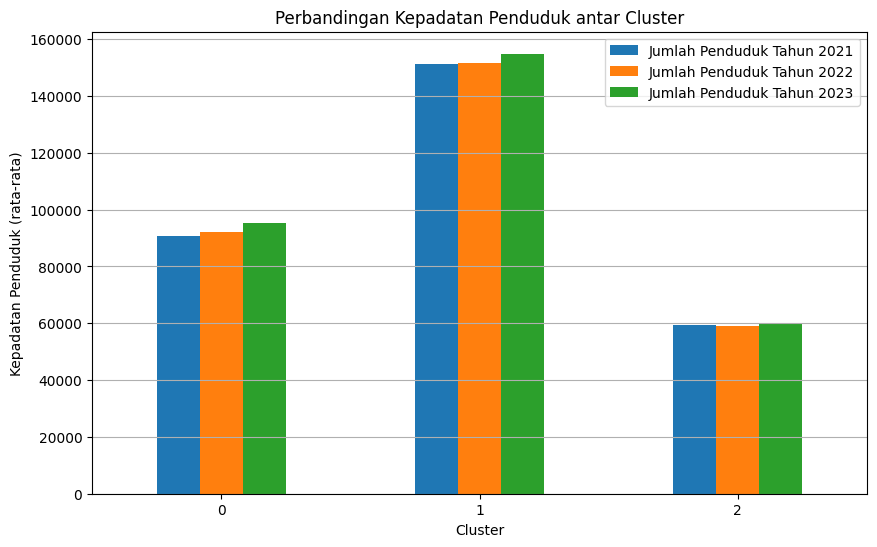

In [ ]:
# Perbandingan Kepadatan Penduduk antar Cluster
cluster_population_density_comparison = data.groupby('Cluster 2021')[['Jumlah Penduduk Tahun 2021', 'Jumlah Penduduk Tahun 2022', 'Jumlah Penduduk Tahun 2023']].mean()
cluster_population_density_comparison.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Cluster')
plt.ylabel('Kepadatan Penduduk (rata-rata)')
plt.title('Perbandingan Kepadatan Penduduk antar Cluster')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Analisis pertumbuhan untuk setiap tahun
growth_analysis = {}
for year in range(2021, 2024):
    next_year = year + 1
    if next_year <= 2023:
        print(f"\nGrowth analysis from {year} to {next_year}:")
        df[f'Growth {year}-{next_year}'] = df[f'Jumlah Penduduk Tahun {next_year}'] - df[f'Jumlah Penduduk Tahun {year}']
        growth_means = df.groupby(f'Cluster {year}')[f'Growth {year}-{next_year}'].mean()
        print(growth_means)



Growth analysis from 2021 to 2022:
Cluster 2021
0    0.026582
1   -0.001727
2   -0.005868
Name: Growth 2021-2022, dtype: float64

Growth analysis from 2022 to 2023:
Cluster 2022
0    0.024197
1   -0.002676
2   -0.004238
Name: Growth 2022-2023, dtype: float64


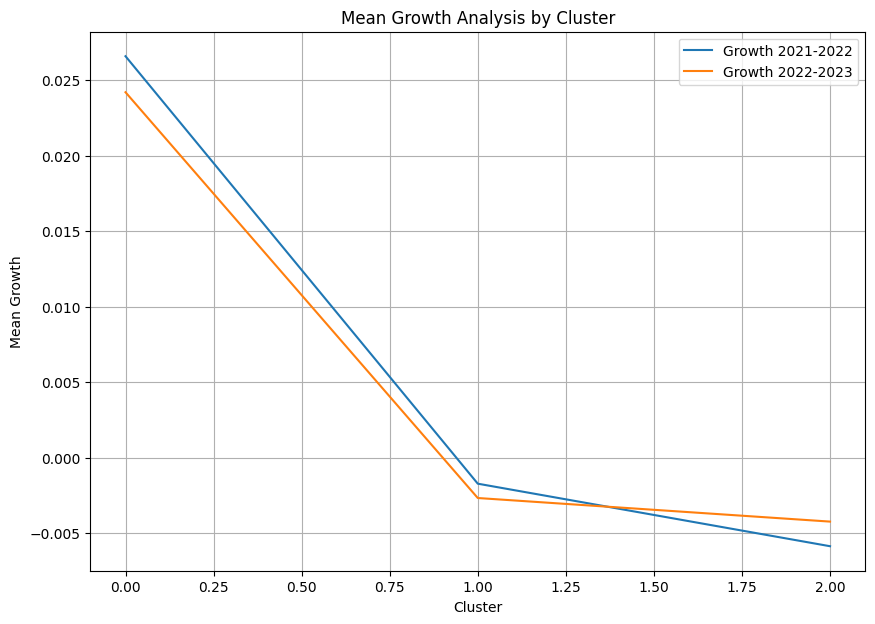

In [ ]:
import matplotlib.pyplot as plt

# Plot growth analysis for each cluster
plt.figure(figsize=(10, 7))
for year in range(2021, 2024):
    next_year = year + 1
    if next_year <= 2023:
        growth_means = df.groupby(f'Cluster {year}')[f'Growth {year}-{next_year}'].mean()
        plt.plot(growth_means, label=f'Growth {year}-{next_year}')

plt.xlabel('Cluster')
plt.ylabel('Mean Growth')
plt.title('Mean Growth Analysis by Cluster')
plt.legend()
plt.grid(True)
plt.show()


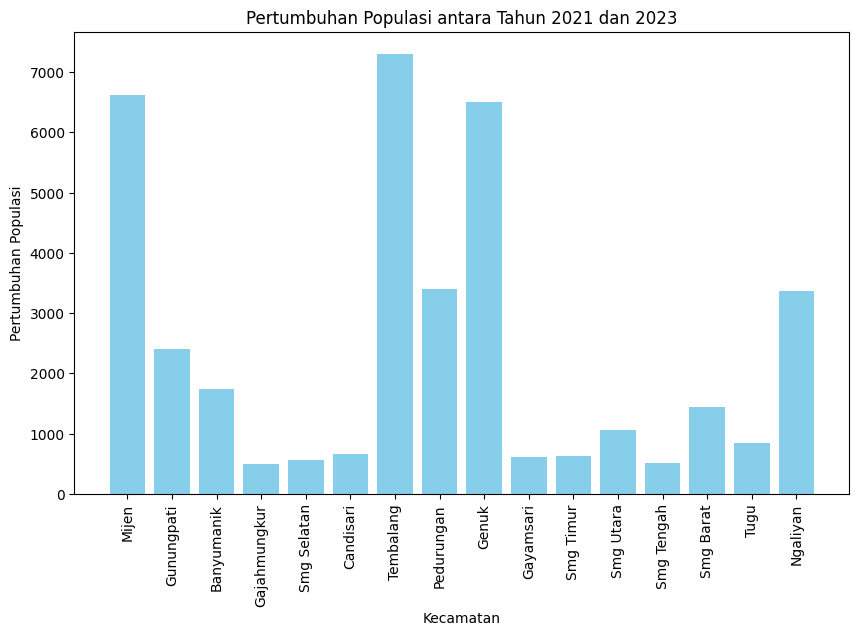

In [ ]:
# Hitung pertumbuhan populasi dari tahun 2021 ke tahun 2023
data['Pertumbuhan Populasi'] = data['Jumlah Penduduk Tahun 2023'] - data['Jumlah Penduduk Tahun 2021']

# Visualisasi pertumbuhan populasi
plt.figure(figsize=(10, 6))
plt.bar(data['Kecamatan'], data['Pertumbuhan Populasi'], color='skyblue')
plt.xlabel('Kecamatan')
plt.ylabel('Pertumbuhan Populasi')
plt.title('Pertumbuhan Populasi antara Tahun 2021 dan 2023')
plt.xticks(rotation=90)
plt.show()

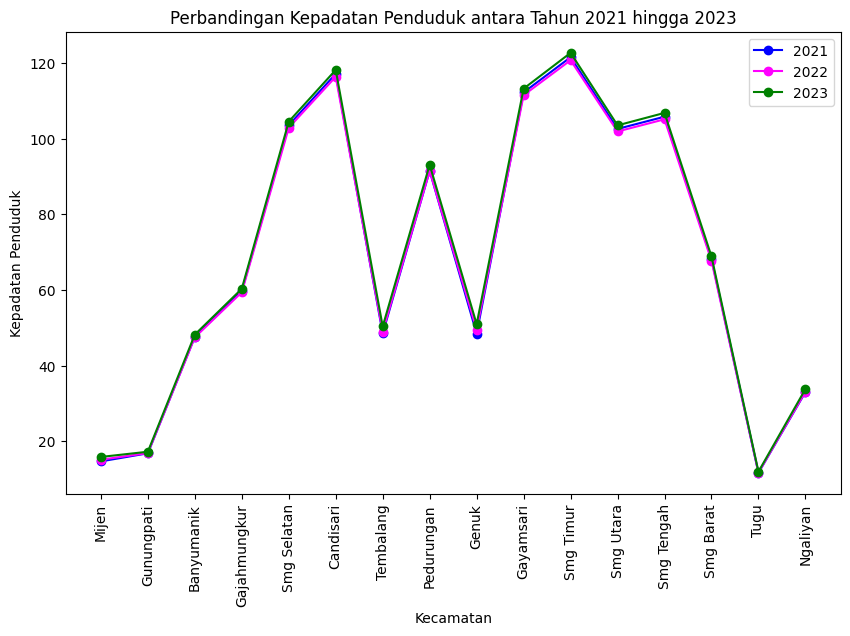

In [ ]:
# Hitung kepadatan penduduk untuk tahun 2021 dan 2023
data['Kepadatan Penduduk 2021'] = data['Jumlah Penduduk Tahun 2021'] / data['Luas Wilayah Tahun 2021']
data['Kepadatan Penduduk 2022'] = data['Jumlah Penduduk Tahun 2022'] / data['Luas Wilayah Tahun 2022']
data['Kepadatan Penduduk 2023'] = data['Jumlah Penduduk Tahun 2023'] / data['Luas Wilayah Tahun 2023']

# Visualisasi perbandingan kepadatan penduduk
plt.figure(figsize=(10, 6))
plt.plot(data['Kecamatan'], data['Kepadatan Penduduk 2021'], marker='o', label='2021', color='blue')
plt.plot(data['Kecamatan'], data['Kepadatan Penduduk 2022'], marker='o', label='2022', color='magenta')
plt.plot(data['Kecamatan'], data['Kepadatan Penduduk 2023'], marker='o', label='2023', color='green')
plt.xlabel('Kecamatan')
plt.ylabel('Kepadatan Penduduk')
plt.title('Perbandingan Kepadatan Penduduk antara Tahun 2021 hingga 2023')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [ ]:
# Temukan kecamatan dengan pertumbuhan penduduk terbesar
kecamatan_terbesar = data.loc[data['Pertumbuhan Populasi'].idxmax()]

print("Kecamatan dengan Pertumbuhan Penduduk Terbesar:")
kecamatan_terbesar

Kecamatan dengan Pertumbuhan Penduduk Terbesar:


Kecamatan                     Tembalang
Luas Wilayah Tahun 2021            3947
Luas Wilayah Tahun 2022            3947
Luas Wilayah Tahun 2023            3947
Jumlah Penduduk Tahun 2021       191560
Jumlah Penduduk Tahun 2022       193480
Jumlah Penduduk Tahun 2023       198862
Cluster 2021                          1
Cluster 2022                          1
Cluster 2023                          1
Kepadatan Penduduk 2021       48.533063
Kepadatan Penduduk 2022       49.019508
Kepadatan Penduduk 2023       50.383076
Pertumbuhan Populasi               7302
Name: 7, dtype: object

In [ ]:
# Menggabungkan Variabel luas wilayah menjadi satu kolom
data['Cluster'] = data[['Cluster 2021', 'Cluster 2022', 'Cluster 2023']].max(axis=1)
data.drop(['Cluster 2021', 'Cluster 2022', 'Cluster 2023'], axis=1, inplace=True)

# Menggabungkan Variabel luas wilayah menjadi satu kolom
data['Total Luas Wilayah'] = data[['Luas Wilayah Tahun 2021', 'Luas Wilayah Tahun 2022', 'Luas Wilayah Tahun 2023']].sum(axis=1)
# Menghapus variabel luas wilayah tahun 2021, 2022, dan 2023 yang tidak digunakan lagi
data.drop(['Luas Wilayah Tahun 2021', 'Luas Wilayah Tahun 2022', 'Luas Wilayah Tahun 2023'], axis=1, inplace=True)
data

,Kecamatan,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk 2021,Kepadatan Penduduk 2022,Kepadatan Penduduk 2023,Pertumbuhan Populasi,Cluster,Total Luas Wilayah
1,Mijen,83321,85818,89948,14.741861,15.183652,15.914367,6627,0,16956
2,Gunungpati,98343,98674,100752,16.877124,16.933928,17.290544,2409,0,17481
3,Banyumanik,141689,141319,143433,47.642569,47.518157,48.228985,1744,1,8922
4,Gajahmungkur,55857,55490,56350,59.804069,59.411135,60.331906,493,2,2802
5,Smg Selatan,61616,61212,62179,103.556303,102.877311,104.502521,563,2,1785
6,Candisari,74952,74461,75614,117.112500,116.345313,118.146875,662,2,1920
7,Tembalang,191560,193480,198862,48.533063,49.019508,50.383076,7302,1,11841
8,Pedurungan,193128,193125,196526,91.486499,91.485078,93.096163,3398,1,6333
9,Genuk,125967,128696,132473,48.486143,49.536567,50.990377,6506,1,7794
10,Gayamsari,69792,69334,70409,112.205788,111.469453,113.197749,617,2,1866


In [ ]:
# Menemukan wilayah terbesar berdasarkan total luas wilayah
wilayah_terbesar = data.loc[data['Total Luas Wilayah'].idxmax()]

# Menemukan wilayah terkecil berdasarkan total luas wilayah
wilayah_terkecil = data.loc[data['Total Luas Wilayah'].idxmin()]

print("Wilayah Terbesar:")
print(wilayah_terbesar)
print("\nWilayah Terkecil:")
print(wilayah_terkecil)

Wilayah Terbesar:
Kecamatan                     Gunungpati
Jumlah Penduduk Tahun 2021         98343
Jumlah Penduduk Tahun 2022         98674
Jumlah Penduduk Tahun 2023        100752
Kepadatan Penduduk 2021        16.877124
Kepadatan Penduduk 2022        16.933928
Kepadatan Penduduk 2023        17.290544
Pertumbuhan Populasi                2409
Cluster                                0
Total Luas Wilayah                 17481
Name: 2, dtype: object

Wilayah Terkecil:
Kecamatan                     Smg Tengah
Jumlah Penduduk Tahun 2021         54696
Jumlah Penduduk Tahun 2022         54338
Jumlah Penduduk Tahun 2023         55213
Kepadatan Penduduk 2021       105.794971
Kepadatan Penduduk 2022       105.102515
Kepadatan Penduduk 2023       106.794971
Pertumbuhan Populasi                 517
Cluster                                2
Total Luas Wilayah                  1551
Name: 13, dtype: object


In [ ]:
# Mengurutkan DataFrame berdasarkan 'Kepadatan Penduduk 2023
data_sorted = data.sort_values(by='Kepadatan Penduduk 2023', ascending=False)

# Menampilkan 3 kecamatan dengan kepadatan penduduk tertinggi
print("\n3 Kecamatan dengan kepadatan penduduk tertinggi:")
display(data_sorted.head(3))

# Menampilkan 3 kecamatan dengan kepadatan penduduk terendah
print("\n3 Kecamatan dengan kepadatan penduduk terendah:")
display(data_sorted.tail(3))


3 Kecamatan dengan kepadatan penduduk tertinggi:


,Kecamatan,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk 2021,Kepadatan Penduduk 2022,Kepadatan Penduduk 2023,Pertumbuhan Populasi,Cluster,Total Luas Wilayah,Rata-rata Jumlah Penduduk
11,Smg Timur,65859,65427,66481,121.511070,120.714022,122.658672,622,2,1626,65922.333333
6,Candisari,74952,74461,75614,117.112500,116.345313,118.146875,662,2,1920,75009.000000
10,Gayamsari,69792,69334,70409,112.205788,111.469453,113.197749,617,2,1866,69845.000000



3 Kecamatan dengan kepadatan penduduk terendah:


,Kecamatan,Jumlah Penduduk Tahun 2021,Jumlah Penduduk Tahun 2022,Jumlah Penduduk Tahun 2023,Kepadatan Penduduk 2021,Kepadatan Penduduk 2022,Kepadatan Penduduk 2023,Pertumbuhan Populasi,Cluster,Total Luas Wilayah,Rata-rata Jumlah Penduduk
2,Gunungpati,98343,98674,100752,16.877124,16.933928,17.290544,2409,0,17481,99256.333333
1,Mijen,83321,85818,89948,14.741861,15.183652,15.914367,6627,0,16956,86362.333333
15,Tugu,32948,33079,33795,11.712762,11.759332,12.013864,847,2,8439,33274.000000
